In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d puneet6060/intel-image-classification

 94% 325M/346M [00:02<00:00, 211MB/s]
100% 346M/346M [00:02<00:00, 155MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/intel-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AvgPool2D , BatchNormalization , Dropout , Flatten,Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import randint

In [42]:
image_gen= ImageDataGenerator(rescale=1./255)

In [43]:
train_data = image_gen.flow_from_directory(
    directory = 'seg_train/seg_train', target_size = (128,128),batch_size = 50 ,seed = 42
)

test_data = image_gen.flow_from_directory(
    directory = 'seg_test/seg_test', target_size = (128,128),batch_size = 50 ,seed = 42
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [44]:
train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [45]:
index_to_classes = {val:key for key, val in dict(train_data.class_indices).items()}
index_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [47]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
train_steps = len(train_data)
test_steps = len(test_data)

In [54]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.regularizers import l2
from keras.models import Sequential

# Define a function for learning rate scheduling
def schedule_learning_rate(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)

model = Sequential()

# Convolution 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.001)))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(AvgPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten and Linear fully connected layers
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(6, activation='softmax'))

# Compile the model
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement data augmentation
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


# Train the model with data augmentation and learning rate scheduling
train_metrics = model.fit_generator(
    generator = train_data,
    steps_per_epoch=train_steps,
    epochs=25,
    callbacks=None,
    validation_data=test_data,
    validation_steps=test_steps
)


Epoch 1/25


<ipython-input-54-23ae67461cfb>:57: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(


281/281 [==============================] - 26s 89ms/step - loss: 1.6813 - accuracy: 0.5947 - val_loss: 4.3149 - val_accuracy: 0.2270
Epoch 2/25
281/281 [==============================] - 25s 87ms/step - loss: 1.2281 - accuracy: 0.7241 - val_loss: 1.5310 - val_accuracy: 0.6183
Epoch 3/25
281/281 [==============================] - 24s 87ms/step - loss: 1.0307 - accuracy: 0.7827 - val_loss: 1.2877 - val_accuracy: 0.7147
Epoch 4/25
281/281 [==============================] - 25s 90ms/step - loss: 0.9371 - accuracy: 0.8073 - val_loss: 1.4620 - val_accuracy: 0.6803
Epoch 5/25
281/281 [==============================] - 26s 92ms/step - loss: 0.8401 - accuracy: 0.8359 - val_loss: 1.6437 - val_accuracy: 0.6673
Epoch 6/25
281/281 [==============================] - 25s 88ms/step - loss: 0.7755 - accuracy: 0.8484 - val_loss: 2.0757 - val_accuracy: 0.5763
Epoch 7/25
281/281 [==============================] - 24s 87ms/step - loss: 0.7721 - accuracy: 0.8521 - val_loss: 1.2534 - val_accuracy: 0.7127
Epo

In [55]:
train_loss = train_metrics.history['loss']
train_accuracy = train_metrics.history['accuracy']
test_loss = train_metrics.history['val_loss']
test_accuracy = train_metrics.history['val_accuracy']

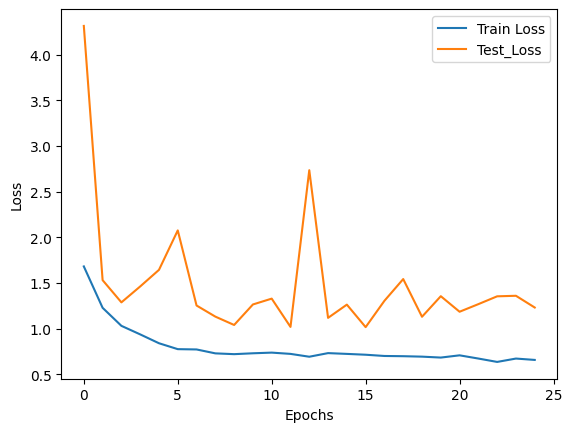

In [56]:
plt.plot(range(25), train_loss, label = 'Train Loss')
plt.plot(range(25),test_loss, label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

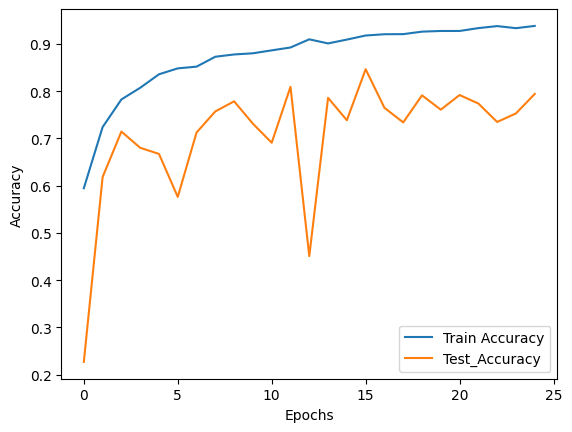

In [57]:
plt.plot(range(25), train_accuracy, label = 'Train Accuracy')
plt.plot(range(25),test_accuracy, label = 'Test_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [58]:
#  model performance
pred_list = [f'seg_pred/seg_pred/{i}' for i in os.listdir('seg_pred/seg_pred')]
pred_list

['seg_pred/seg_pred/7013.jpg',
 'seg_pred/seg_pred/15969.jpg',
 'seg_pred/seg_pred/16117.jpg',
 'seg_pred/seg_pred/18732.jpg',
 'seg_pred/seg_pred/11997.jpg',
 'seg_pred/seg_pred/10987.jpg',
 'seg_pred/seg_pred/668.jpg',
 'seg_pred/seg_pred/7575.jpg',
 'seg_pred/seg_pred/18174.jpg',
 'seg_pred/seg_pred/4071.jpg',
 'seg_pred/seg_pred/18093.jpg',
 'seg_pred/seg_pred/7623.jpg',
 'seg_pred/seg_pred/17535.jpg',
 'seg_pred/seg_pred/9982.jpg',
 'seg_pred/seg_pred/17447.jpg',
 'seg_pred/seg_pred/12253.jpg',
 'seg_pred/seg_pred/2841.jpg',
 'seg_pred/seg_pred/4169.jpg',
 'seg_pred/seg_pred/17109.jpg',
 'seg_pred/seg_pred/2235.jpg',
 'seg_pred/seg_pred/4495.jpg',
 'seg_pred/seg_pred/6774.jpg',
 'seg_pred/seg_pred/2533.jpg',
 'seg_pred/seg_pred/19340.jpg',
 'seg_pred/seg_pred/7011.jpg',
 'seg_pred/seg_pred/11324.jpg',
 'seg_pred/seg_pred/11078.jpg',
 'seg_pred/seg_pred/3451.jpg',
 'seg_pred/seg_pred/18964.jpg',
 'seg_pred/seg_pred/13670.jpg',
 'seg_pred/seg_pred/19457.jpg',
 'seg_pred/seg_pred/163

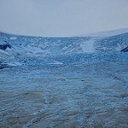

Model Predection :  sea
**************************************************


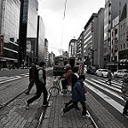

Model Predection :  street
**************************************************


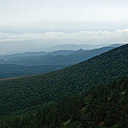

Model Predection :  mountain
**************************************************


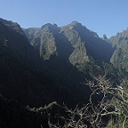

Model Predection :  mountain
**************************************************


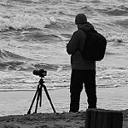

Model Predection :  sea
**************************************************


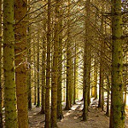

Model Predection :  forest
**************************************************


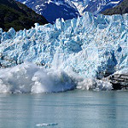

Model Predection :  glacier
**************************************************


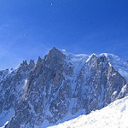

Model Predection :  buildings
**************************************************


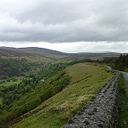

Model Predection :  mountain
**************************************************


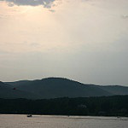

Model Predection :  mountain
**************************************************


In [59]:
for i in range(10):
  num = randint(0, len(pred_list))
  image = Image.open(pred_list[num])
  image = image.resize((128, 128))
  display(image)
  image_array = np.array(image)
  image_array = image_array[np.newaxis, :]
  image_array = image_array.astype('float')
  image_array = image_gen.standardize(image_array)
  probability = model(image_array)
  pred = np.argmax(probability)
  print('Model Predection : ',index_to_classes[pred])

  print('*'*50)